In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl
from IPython.core.pylabtools import figsize

In [2]:
figsize(15, 15)


# Загрузка данных


In [3]:
import requests as r

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
response = r.get(url)

In [5]:
from io import StringIO

In [6]:
df = pd.read_csv(StringIO(response.text))

In [7]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


## Анализ и очистка данных


Посмотрим пропуски и типы данных


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318491 entries, 0 to 318490
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    318491 non-null  object 
 1   continent                                   303340 non-null  object 
 2   location                                    318491 non-null  object 
 3   date                                        318491 non-null  object 
 4   total_cases                                 282164 non-null  float64
 5   new_cases                                   309582 non-null  float64
 6   new_cases_smoothed                          308318 non-null  float64
 7   total_deaths                                261272 non-null  float64
 8   new_deaths                                  309633 non-null  float64
 9   new_deaths_smoothed                         308403 non-null  float64
 

Хорошо, что немного не числовых типов данных, не придется много кодировать


Но много колонок имеет хотя бы половину пропусков. Нужно их почистить


In [9]:
drop_columns = []
size = len(df)

for column in df.columns:
    part = df[column].notna().sum() / size
    if part <= 0.5:
        drop_columns.append(column)

df = df.drop(columns=drop_columns)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318491 entries, 0 to 318490
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    318491 non-null  object 
 1   continent                                   303340 non-null  object 
 2   location                                    318491 non-null  object 
 3   date                                        318491 non-null  object 
 4   total_cases                                 282164 non-null  float64
 5   new_cases                                   309582 non-null  float64
 6   new_cases_smoothed                          308318 non-null  float64
 7   total_deaths                                261272 non-null  float64
 8   new_deaths                                  309633 non-null  float64
 9   new_deaths_smoothed                         308403 non-null  float64
 

Отлично, колонок стало в дра раза меньше


In [11]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0


In [12]:
df[df.iso_code == 'AFG']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,AFG,Asia,Afghanistan,2023-06-10,222520.0,93.0,77.571,7920.0,1.0,0.286,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1255,AFG,Asia,Afghanistan,2023-06-11,222524.0,4.0,75.571,7920.0,0.0,0.286,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1256,AFG,Asia,Afghanistan,2023-06-12,222603.0,79.0,75.143,7920.0,0.0,0.286,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1257,AFG,Asia,Afghanistan,2023-06-13,222603.0,0.0,62.143,7920.0,0.0,0.286,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0


Так как название страны дублируется в коде и локации, то я сброшу название локации, так как код является стандартным представлением.


In [13]:
df = df.drop(columns=['location'])

Преобразуем дату к временной метке, для удобства оперирования и хронологии числового представления


In [14]:
from datetime import datetime

In [15]:
df.date = df.date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d').timestamp())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318491 entries, 0 to 318490
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    318491 non-null  object 
 1   continent                                   303340 non-null  object 
 2   date                                        318491 non-null  float64
 3   total_cases                                 282164 non-null  float64
 4   new_cases                                   309582 non-null  float64
 5   new_cases_smoothed                          308318 non-null  float64
 6   total_deaths                                261272 non-null  float64
 7   new_deaths                                  309633 non-null  float64
 8   new_deaths_smoothed                         308403 non-null  float64
 9   total_cases_per_million                     282164 non-null  float64
 

Теперь посмотрю, где пропуски в континенте и заполню или удалю


In [17]:
df[df.continent.isna()].iso_code.unique()

array(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_HIC',
       'OWID_LIC', 'OWID_LMC', 'OWID_NAM', 'OWID_OCE', 'OWID_SAM',
       'OWID_UMC', 'OWID_WRL'], dtype=object)

Так как пропусков немного и они в межгосударственных образованиях или в объединении государств, то просто сброшу их


In [18]:
df

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,1.577999e+09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1,AFG,Asia,1.578085e+09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
2,AFG,Asia,1.578172e+09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
3,AFG,Asia,1.578258e+09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
4,AFG,Asia,1.578344e+09,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,1.337,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318486,ZWE,Africa,1.686344e+09,265161.0,0.0,3.143,5695.0,0.0,0.0,16247.074,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
318487,ZWE,Africa,1.686431e+09,265161.0,0.0,3.143,5695.0,0.0,0.0,16247.074,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
318488,ZWE,Africa,1.686517e+09,265289.0,128.0,21.429,5702.0,7.0,1.0,16254.917,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
318489,ZWE,Africa,1.686604e+09,265289.0,NaN,NaN,5702.0,0.0,1.0,16254.917,...,1.882,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0


Но нет, все таки просто сброшу полностью, потому что за географию будет отвечать страна

In [19]:
df = df.drop(columns=['continent'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318491 entries, 0 to 318490
Data columns (total 33 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    318491 non-null  object 
 1   date                                        318491 non-null  float64
 2   total_cases                                 282164 non-null  float64
 3   new_cases                                   309582 non-null  float64
 4   new_cases_smoothed                          308318 non-null  float64
 5   total_deaths                                261272 non-null  float64
 6   new_deaths                                  309633 non-null  float64
 7   new_deaths_smoothed                         308403 non-null  float64
 8   total_cases_per_million                     282164 non-null  float64
 9   new_cases_per_million                       309582 non-null  float64
 

In [21]:
df[df.iso_code == 'USA'][150:].reproduction_rate

299829    0.99
299830    1.00
299831    1.00
299832    1.02
299833    1.01
          ... 
300933     NaN
300934     NaN
300935     NaN
300936     NaN
300937     NaN
Name: reproduction_rate, Length: 1109, dtype: float64

<Axes: xlabel='date', ylabel='gdp_per_capita'>

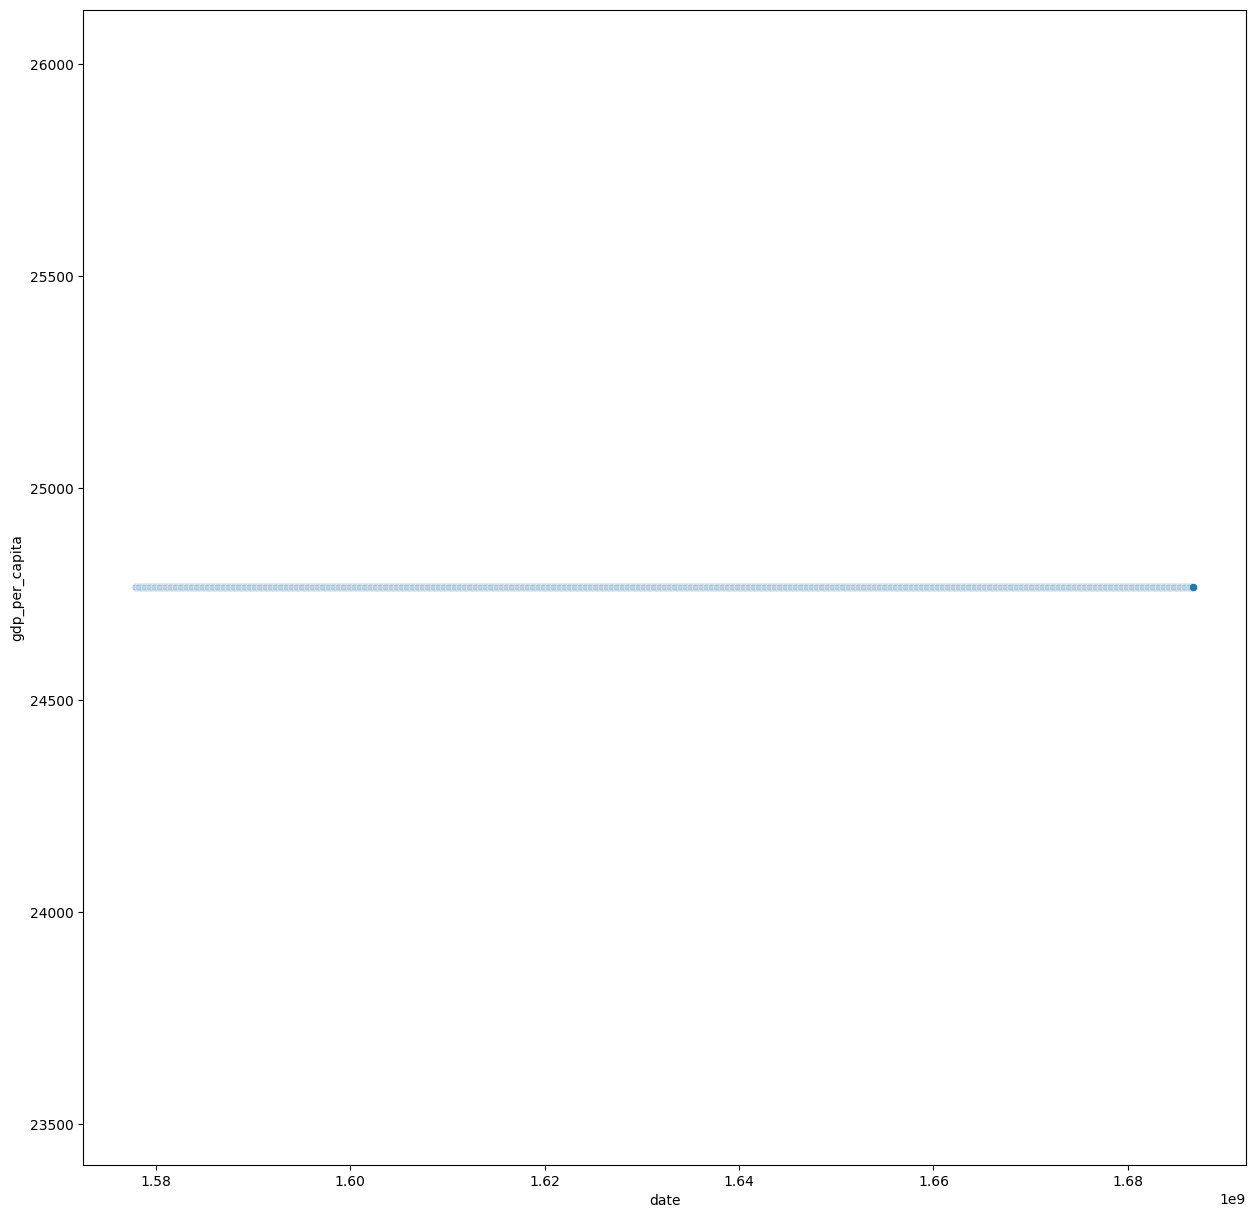

In [22]:
sb.scatterplot(x=df[df.iso_code == 'RUS'].date,
               y=df[df.iso_code == 'RUS'].gdp_per_capita)

Сброшу female and male smokers, потому что они вряд-ли влияют на заразность и у них довольно много пропусков


In [23]:
df = df.drop(columns=['female_smokers', 'male_smokers'])

Так же сбросим stringency_index, new_people_vaccinated_smoothed_per_hundred, new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred так как слишком много пропусков


In [24]:
df = df.drop(columns=['stringency_index', 'new_people_vaccinated_smoothed_per_hundred', 'new_vaccinations_smoothed',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred'])

Удаляю new_cases_per_million, потому что она будет линейно зависима с new_cases, а new_cases_smoothed_per_million линейно с new_cases_smoothed, new_deaths_per_million, total_deaths_per_million и new_deaths_smoothed_per_million аналогично


In [25]:
df = df.drop(columns=['new_cases_per_million',
             'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'new_deaths_per_million', 'total_deaths_per_million', 'total_cases_per_million'])

Так же удалю все континенты

In [26]:
df =df[~df.iso_code.astype(str).str.startswith('OWID_')]

Так же удалю total_cases, total_deaths, потому что они будут просто постоянно расти и не влияют на коэффициент


In [27]:
df = df.drop(columns=['total_cases', 'total_deaths'])

Теперь заполню основную часть пропусков, кроме общего количества случаев и всех случаев. Для заполнения будет браться медианное значение с поправкой на страну


Эти столбцы будут заполнены медианным значением, потому что они либо статичны, либо вряд ли имеют большую корреляцию с целевой


In [28]:
MEDIAN_LIST = ['gpd_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
               'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'aged_65_older', 'aged_70_older', 'population_density', 'median_age', 'gdp_per_capita']


def median_filler(country: str):
    def inner(col: str):

        median = df[df.iso_code == country][col].median()
        df.loc[df.iso_code == country, col] = df[df.iso_code ==
                                                 country][col].fillna(0 if np.isnan(median) else median)

    return inner

In [29]:
ZERO_FILL = ['reproduction_rate',
             'new_deaths_smoothed', 'new_deaths', 'new_cases', 'new_cases_smoothed']


def zero_filler(country: str):
    def inner(col: str):

        df.loc[df.iso_code == country, col] = df[df.iso_code ==
                                                 country][col].fillna(0)

    return inner

In [30]:
for country in df.iso_code.unique():
    med_filler = median_filler(country)
    z_filler = zero_filler(country)

    for column in df.columns:
        if column in ZERO_FILL:
            z_filler(column)
        elif column in MEDIAN_LIST:
            med_filler(column)

c:\Users\VPR\Desktop\big-data\.venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\VPR\Desktop\big-data\.venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\VPR\Desktop\big-data\.venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\VPR\Desktop\big-data\.venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\VPR\Desktop\big-data\.venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\VPR\Desktop\big-data\.venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mea

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296674 entries, 0 to 318490
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   iso_code                    296674 non-null  object 
 1   date                        296674 non-null  float64
 2   new_cases                   296674 non-null  float64
 3   new_cases_smoothed          296674 non-null  float64
 4   new_deaths                  296674 non-null  float64
 5   new_deaths_smoothed         296674 non-null  float64
 6   reproduction_rate           296674 non-null  float64
 7   population_density          296674 non-null  float64
 8   median_age                  296674 non-null  float64
 9   aged_65_older               296674 non-null  float64
 10  aged_70_older               296674 non-null  float64
 11  gdp_per_capita              296674 non-null  float64
 12  cardiovasc_death_rate       296674 non-null  float64
 13  diabetes_prevalence

Теперь преступим к выведению коэффициента. Но так как формула не дает объяснений, что делать, при количестве дней меньше 8, то я буду просто пропускать и не считать коэффициент для них


In [32]:
LAST_COUNTRY = None
DAYS = 7

LAST_INDEXES = []

RTS = []

for index, row in df.iterrows():
    if LAST_COUNTRY != row.iso_code:
        LAST_COUNTRY = row.iso_code
        LAST_INDEXES = []
        
    LAST_INDEXES.append(index)

    if len(LAST_INDEXES) < DAYS + 1:
        RTS.append(np.nan)
        continue

    result = df[(df.index >= LAST_INDEXES[0]) & (df.index <= index)]
    cases = list(result.to_dict()['new_cases'].values())
    latest = cases[:4]
    newest = cases[4:]
    try:
        rt = sum(newest) / sum(latest)
    except:
        rt = 0
    RTS.append(rt)
    LAST_INDEXES = LAST_INDEXES[1:]

df['rt'] = RTS

KeyboardInterrupt: 

Теперь сбрасываем все пустые записи, это будут первые 7 дней


In [ ]:
df = df.drop(df[df.rt.isna()].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294974 entries, 7 to 318425
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   iso_code                    294974 non-null  object 
 1   date                        294974 non-null  float64
 2   new_cases                   294974 non-null  float64
 3   new_cases_smoothed          294974 non-null  float64
 4   new_deaths                  294974 non-null  float64
 5   new_deaths_smoothed         294974 non-null  float64
 6   reproduction_rate           294974 non-null  float64
 7   population_density          294974 non-null  float64
 8   median_age                  294974 non-null  float64
 9   aged_65_older               294974 non-null  float64
 10  aged_70_older               294974 non-null  float64
 11  gdp_per_capita              294974 non-null  float64
 12  cardiovasc_death_rate       294974 non-null  float64
 13  diabetes_prevalence

<Axes: xlabel='date', ylabel='rt'>

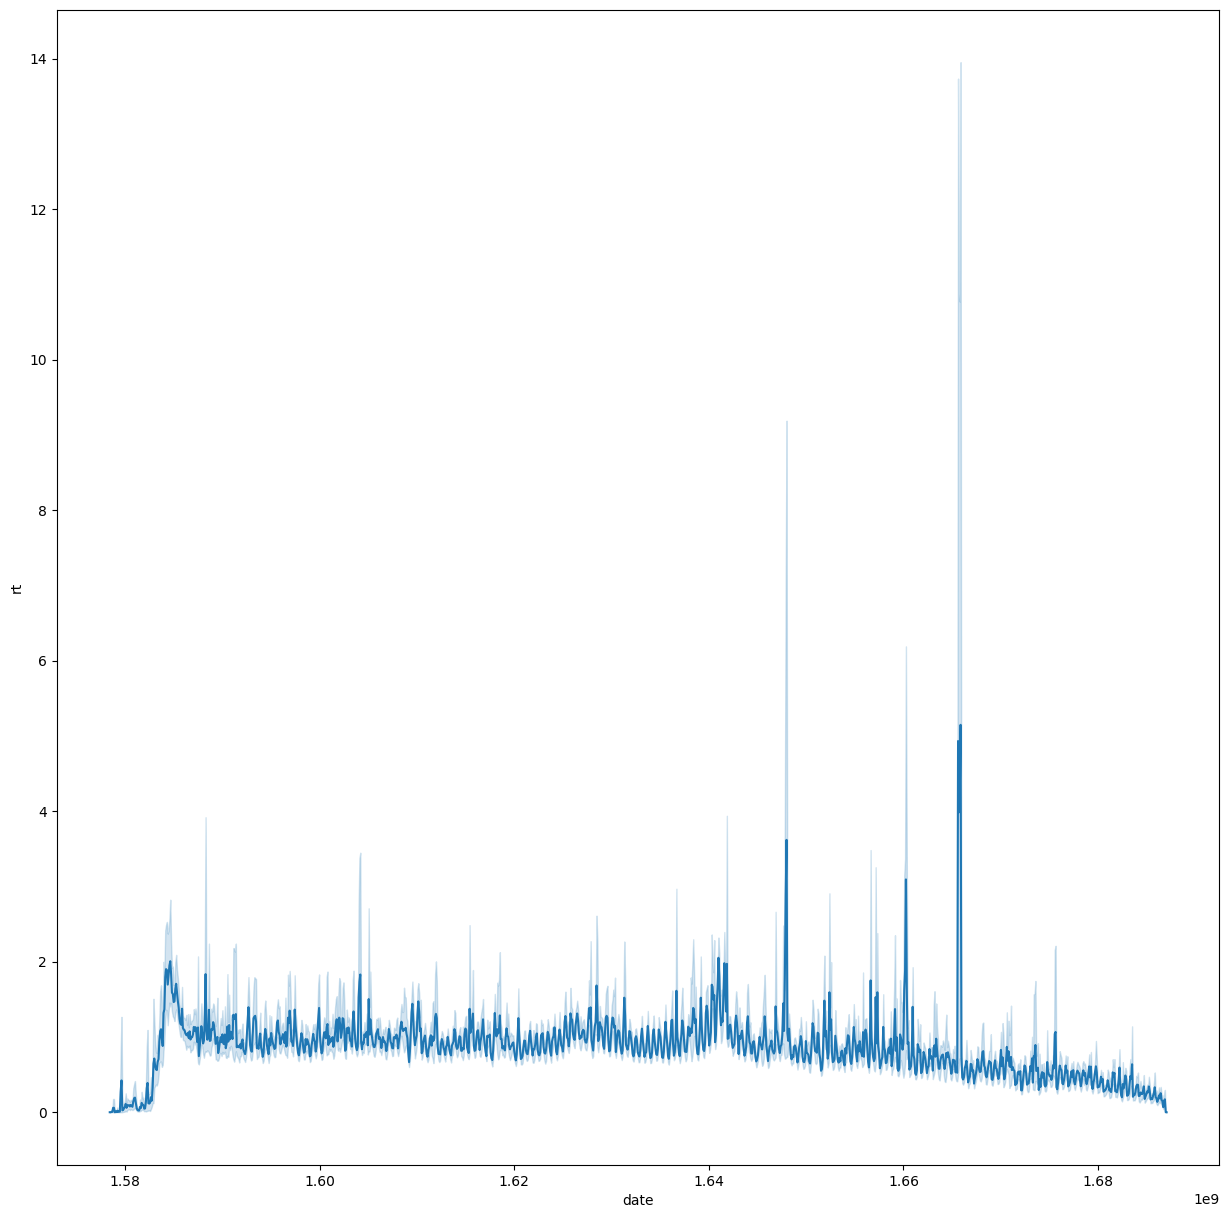

In [ ]:
sb.lineplot(x=df.date, y=df.rt)

Очень странные выбросы под конец, я его уберу, что то не так в расчетах, наверное

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
date,294974.0,1.632694e+09,3.120809e+07,1.578431e+09,1.605647e+09,1.632690e+09,1.659733e+09,1.687036e+09
new_cases,294974.0,2.602690e+03,3.851327e+04,0.000000e+00,0.000000e+00,9.000000e+00,3.280000e+02,6.966046e+06
new_cases_smoothed,294974.0,2.601904e+03,3.685624e+04,0.000000e+00,4.290000e-01,2.600000e+01,4.205710e+02,5.882129e+06
new_deaths,294974.0,2.355021e+01,1.425584e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.144700e+04
new_deaths_smoothed,294974.0,2.354230e+01,1.325294e+02,0.000000e+00,0.000000e+00,1.430000e-01,4.286000e+00,4.190000e+03
reproduction_rate,294974.0,5.636916e-01,5.424105e-01,-7.000000e-02,0.000000e+00,6.300000e-01,1.020000e+00,5.870000e+00
population_density,294974.0,3.720612e+02,1.786368e+03,0.000000e+00,2.266200e+01,8.008000e+01,2.117010e+02,2.054677e+04
median_age,294974.0,2.571602e+01,1.389609e+01,0.000000e+00,1.880000e+01,2.750000e+01,3.740000e+01,4.820000e+01
aged_65_older,294974.0,7.077815e+00,6.469399e+00,0.000000e+00,2.562000e+00,4.591000e+00,1.119800e+01,2.704900e+01
aged_70_older,294974.0,4.589808e+00,4.303995e+00,0.000000e+00,1.542000e+00,2.891000e+00,7.049000e+00,1.849300e+01


In [ ]:
df[df.rt >= 5]

,iso_code,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,population,rt
75,AFG,1.584479e+09,6.0,2.571,0.0,0.000,0.00,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,41128772.0,5.000000
76,AFG,1.584565e+09,0.0,2.143,0.0,0.000,0.00,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,41128772.0,5.000000
83,AFG,1.585170e+09,32.0,7.429,0.0,0.143,0.00,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,41128772.0,25.000000
84,AFG,1.585256e+09,0.0,7.429,0.0,0.143,0.00,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,41128772.0,25.000000
234,AFG,1.598216e+09,59.0,51.000,0.0,1.429,0.89,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511,41128772.0,7.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318161,ZWE,1.663880e+09,30.0,50.000,1.0,0.429,1.33,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.7,61.49,0.571,16320539.0,5.140351
318192,ZWE,1.666559e+09,132.0,18.857,2.0,0.286,0.20,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.7,61.49,0.571,16320539.0,11.000000
318241,ZWE,1.670792e+09,203.0,29.000,3.0,0.429,0.07,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.7,61.49,0.571,16320539.0,33.833333
318423,ZWE,1.686517e+09,128.0,21.429,7.0,1.000,0.00,42.729,19.6,2.822,1.882,1899.775,307.846,1.82,1.7,61.49,0.571,16320539.0,5.818182


Есть существенные выбросы, которых не так много. Удалю их

In [ ]:
# df = df.drop(df[df.rt >= 5].index)

Теперь удалим все записи до 11.03.2020 и  после 05.05.2023, потому что эти даты не входят в период пандемии

In [ ]:
def get_timestamp(time:str) -> float:
    return datetime.strptime(time, '%Y-%m-%d').timestamp()

In [ ]:
df = df.drop(df[(df.date <= get_timestamp('2020-03-11')) |
             (df.date >= get_timestamp('2023-05-05'))].index)

<Axes: xlabel='date', ylabel='rt'>

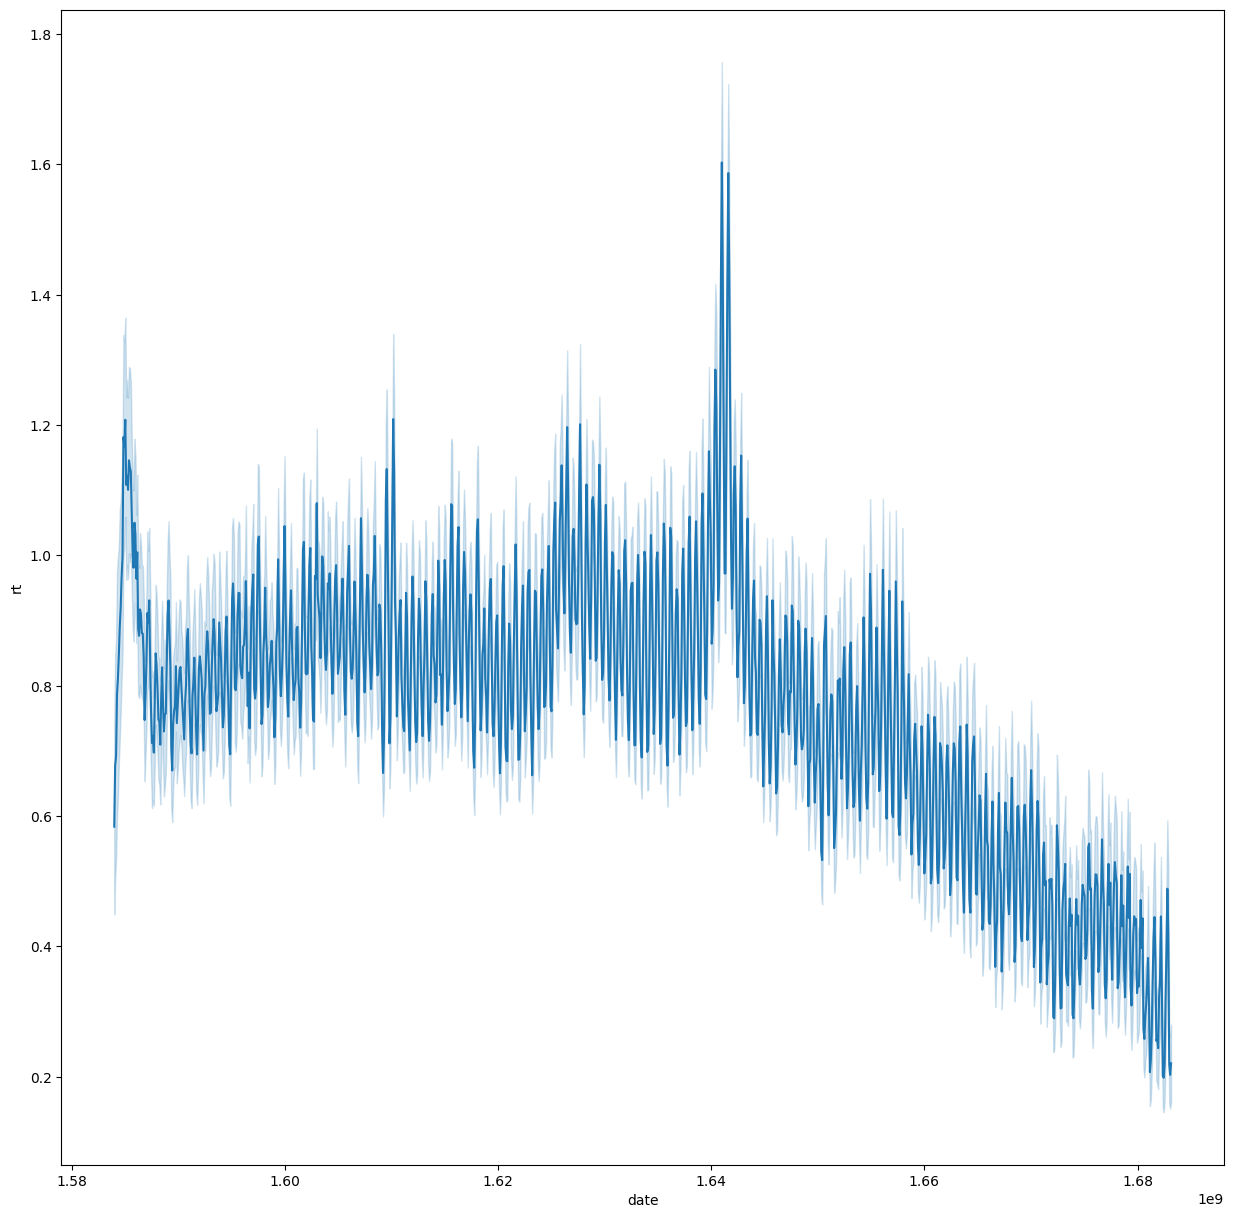

In [ ]:
sb.lineplot(x=df.date, y=df.rt)

Теперь график больше похож на то, что должно получиться

Теперь закодирую первые два столбца label encoder'ом, потому что там очень много значений


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoders: dict[str, LabelEncoder] = {}

In [ ]:
encode_columns = ['iso_code']

for column in encode_columns:
    encoder = LabelEncoder()
    encoders[column] = encoder
    df[column] = encoder.fit_transform(df[column])

<Axes: >

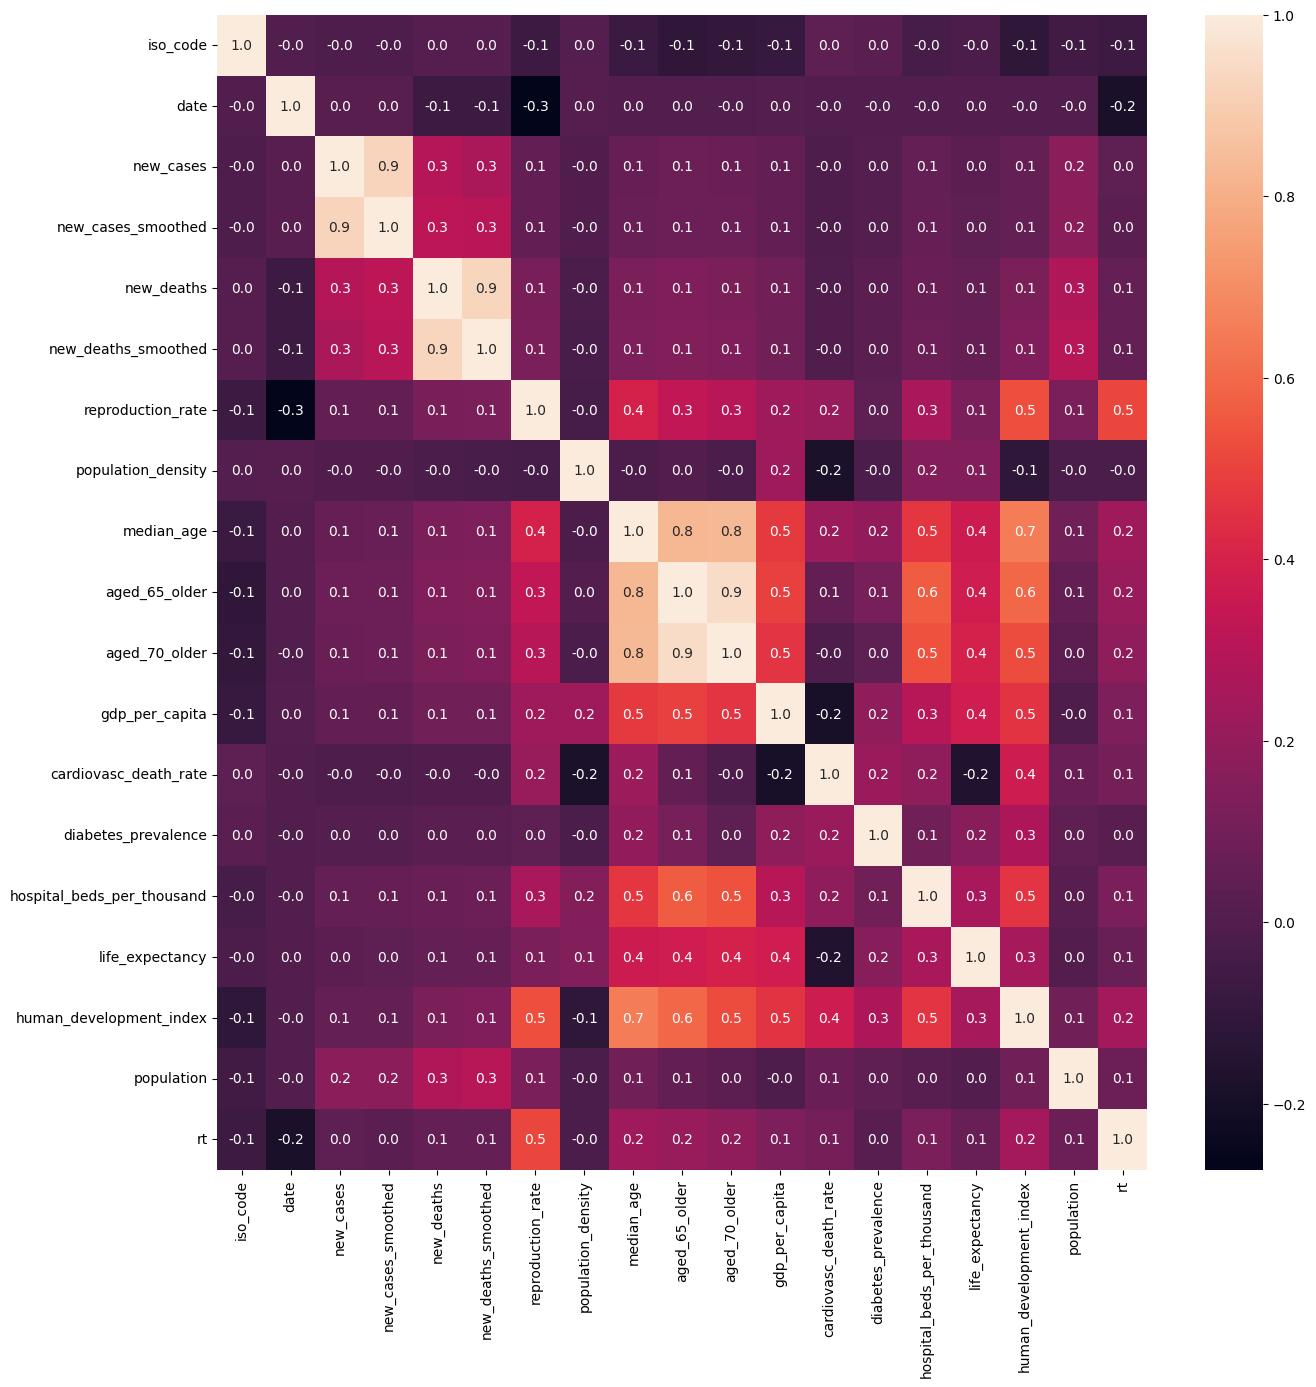

In [ ]:
sb.heatmap(df.corr(), annot=True, fmt='.1f')

Теперь удалю колонки new_cases_smoothed, new_death_smoothed, aged_65_older, aged_70_older, потому что они имеют со-зависимые поля

In [ ]:
df = df.drop(columns=['aged_65_older', 'aged_70_older', 'new_deaths_smoothed', 'new_cases_smoothed'])

# Сохранение данных

In [ ]:
stringify = df.to_json()
with open('./prepared.json', "w") as f:
    f.write(stringify)